In [21]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
print('done')

done


Pre process

In [22]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


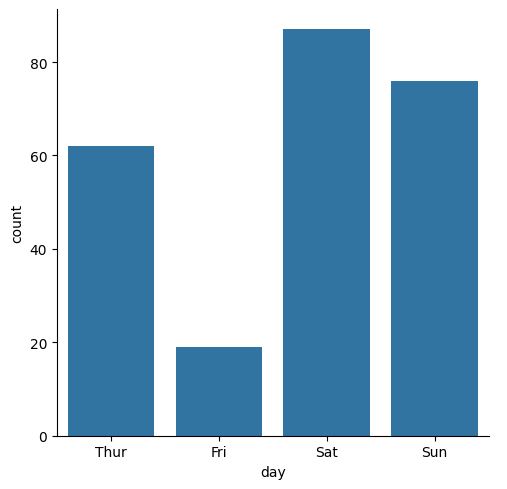

In [23]:
sns.catplot(x='day' , kind='count' , data=df)

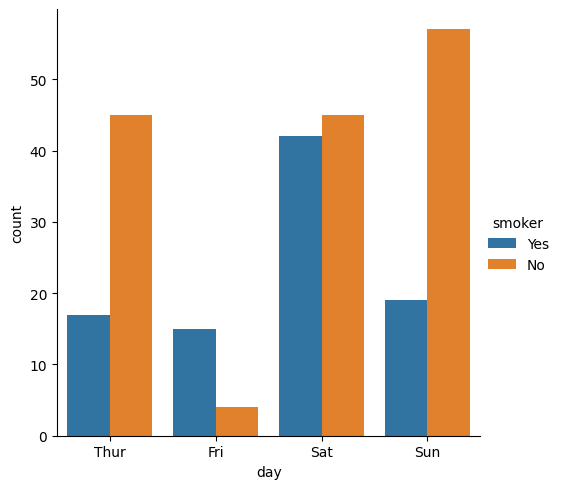

In [24]:


sns.catplot(x='day' ,hue='smoker', kind='count' , data=df)

In [25]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
df.replace({'sex':{'Male' :0 , 'Female':1} , 'smoker': {'No' :0 , 'Yes':1} } , inplace=True)
df.head()

C:\Users\Emertat\AppData\Local\Temp\ipykernel_13860\1476864113.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'Male' :0 , 'Female':1} , 'smoker': {'No' :0 , 'Yes':1} } , inplace=True)
C:\Users\Emertat\AppData\Local\Temp\ipykernel_13860\1476864113.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace({'sex':{'Male' :0 , 'Female':1} , 'smoker': {'No' :0 , 'Yes':1} } , inplace=True)
C:\Users\Emertat\AppData\Local\Temp\ipykernel_13860\1476864113.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and w

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


In [27]:
days = pd.get_dummies(df['day'])
df = pd.concat([df,days],axis=1)

In [28]:
df = pd.concat([df, pd.get_dummies(df['day']).astype(int)], axis=1)


In [29]:
time = pd.get_dummies(df['time'])
df = pd.concat([df,time],axis=1)

In [30]:
df = pd.concat([df, pd.get_dummies(df['time']).astype(int)], axis=1)


In [31]:
df

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun,Thur,Fri,Sat,Sun,Lunch,Dinner,Lunch,Dinner
0,16.99,1.01,1,0,Sun,Dinner,2,False,False,False,True,0,0,0,1,False,True,0,1
1,10.34,1.66,0,0,Sun,Dinner,3,False,False,False,True,0,0,0,1,False,True,0,1
2,21.01,3.50,0,0,Sun,Dinner,3,False,False,False,True,0,0,0,1,False,True,0,1
3,23.68,3.31,0,0,Sun,Dinner,2,False,False,False,True,0,0,0,1,False,True,0,1
4,24.59,3.61,1,0,Sun,Dinner,4,False,False,False,True,0,0,0,1,False,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,Sat,Dinner,3,False,False,True,False,0,0,1,0,False,True,0,1
240,27.18,2.00,1,1,Sat,Dinner,2,False,False,True,False,0,0,1,0,False,True,0,1
241,22.67,2.00,0,1,Sat,Dinner,2,False,False,True,False,0,0,1,0,False,True,0,1
242,17.82,1.75,0,0,Sat,Dinner,2,False,False,True,False,0,0,1,0,False,True,0,1


In [32]:
X = df[['sex','smoker','size','Fri','Sat','Sun','Dinner']]
Y=df[['tip']]


In [33]:
X

,sex,smoker,size,Fri,Fri,Sat,Sat,Sun,Sun,Dinner,Dinner
0,1,0,2,False,0,False,0,True,1,True,1
1,0,0,3,False,0,False,0,True,1,True,1
2,0,0,3,False,0,False,0,True,1,True,1
3,0,0,2,False,0,False,0,True,1,True,1
4,1,0,4,False,0,False,0,True,1,True,1
...,...,...,...,...,...,...,...,...,...,...,...
239,0,0,3,False,0,True,1,False,0,True,1
240,1,1,2,False,0,True,1,False,0,True,1
241,0,1,2,False,0,True,1,False,0,True,1
242,0,0,2,False,0,True,1,False,0,True,1


In [34]:
Y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


main

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [36]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=26) 

In [37]:
regressor = LinearRegression()
regressor.fit(X_train , Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


<Axes: ylabel='Count'>

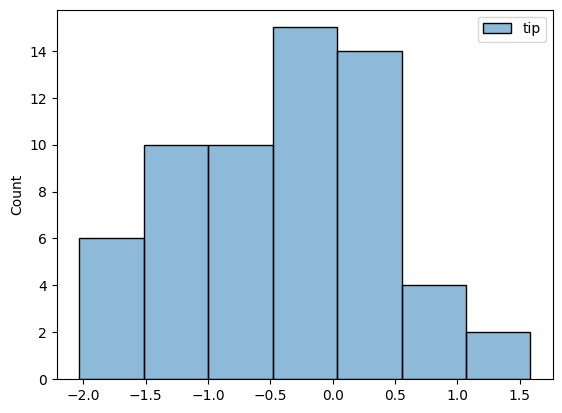

In [38]:
Preditions = regressor.predict(X_test)
sns.histplot(Y_test-Preditions)